In [32]:
import numpy as np
import argparse
from PIL import Image
from datasets import load_dataset
from transformers import AutoImageProcessor, ViTForImageClassification
from src.masks import get_mask
import cv2

In [28]:
dataset = load_dataset("cats_vs_dogs", revision="main")
image = dataset["train"]["image"][0]

Found cached dataset cats_vs_dogs (/home/amir/.cache/huggingface/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb)
100%|██████████| 1/1 [00:00<00:00, 347.76it/s]


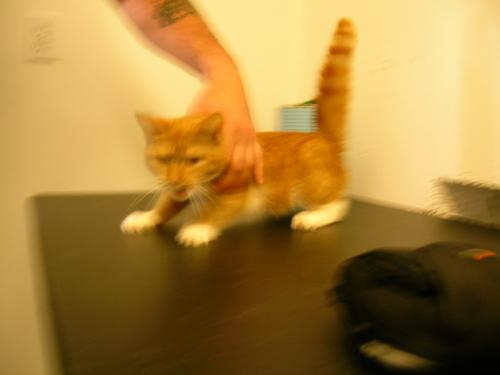

In [30]:
image

In [34]:
res = cv2.resize(np.array(image), (384, 384))
res

array([[[203, 164,  87],
        [203, 164,  87],
        [205, 166,  89],
        ...,
        [241, 202, 123],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [205, 166,  89],
        ...,
        [241, 202, 123],
        [239, 200, 121],
        [239, 200, 121]],

       [[203, 164,  87],
        [203, 164,  87],
        [205, 166,  89],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [153, 122,  55],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [152, 121,  54],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

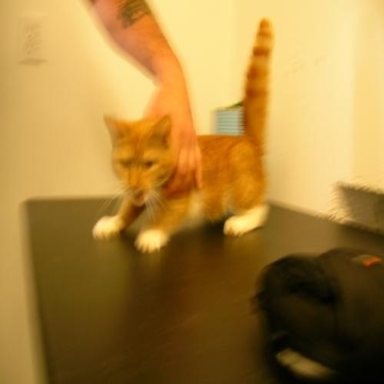

In [35]:
Image.fromarray(res)

In [14]:
processor = AutoImageProcessor.from_pretrained('google/vit-base-patch32-384')
resized = processor(images=image, return_tensors="np")["pixel_values"]

In [27]:
resized.shape

(1, 3, 384, 384)